# Ford GoBike System Data Exploration
## by Masa Abdalhalim

- <a href="#import">Importing Libraries</a></li>

- <a href="#assess">Loading and Assessing Data</a></li>
  
- <a href="#clean">Cleaning Data</a></li>

- <a href="#store">Storing Data</a></li>

- <a href="#Visual">Analyzing and Visualizing Data</a></li>
    - <a href="#uni">Univariate Exploration</a></li>
    - <a href="#bi">Bivariate Exploration</a></li>
    - <a href="#mul">Multivariate Exploration</a></li>


<a id='import'></a>
<hr>

## Importing Libraries

In [18]:
#prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='assess'></a>
<hr>

## Loading and Assessing Data

In [19]:
data1 = pd.read_csv('201801-fordgobike-tripdata.csv')
data2 = pd.read_csv('201802-fordgobike-tripdata.csv')
data3 = pd.read_csv('201803-fordgobike-tripdata.csv')
data4 = pd.read_csv('201804-fordgobike-tripdata.csv')
data5 = pd.read_csv('201805-fordgobike-tripdata.csv')
data6 = pd.read_csv('201806-fordgobike-tripdata.csv')
data7 = pd.read_csv('201807-fordgobike-tripdata.csv')
data8 = pd.read_csv('201808-fordgobike-tripdata.csv')
data9 = pd.read_csv('201809-fordgobike-tripdata.csv')
data10 = pd.read_csv('201810-fordgobike-tripdata.csv')
data11 = pd.read_csv('201811-fordgobike-tripdata.csv')
data12 = pd.read_csv('201812-fordgobike-tripdata.csv')

In [20]:
results = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12], ignore_index=True, sort=False)
results.to_csv('2018-fordgobike-tripdata.csv', sep=',', encoding='utf-8')

In [21]:
fordgobike_2018 = pd.read_csv('2018-fordgobike-tripdata.csv', index_col = 0)

In [22]:
fordgobike_2018.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
945354,124,2018-07-12 18:53:17.4090,2018-07-12 18:55:21.6030,134.0,Valencia St at 24th St,37.752428,-122.420628,133.0,Valencia St at 22nd St,37.755213,-122.420975,1883,Subscriber,1978.0,Male,No
1146492,864,2018-08-10 18:33:57.1520,2018-08-10 18:48:21.3480,145.0,29th St at Church St,37.743684,-122.426806,123.0,Folsom St at 19th St,37.760594,-122.414817,2543,Subscriber,NaN,NaN,No
1769756,1119,2018-12-19 19:39:26.7510,2018-12-19 19:58:05.8700,96.0,Dolores St at 15th St,37.766210,-122.426614,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5528,Subscriber,1992.0,Male,No
1667338,811,2018-11-12 13:06:08.1000,2018-11-12 13:19:39.7450,36.0,Folsom St at 3rd St,37.783830,-122.398870,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,700,Subscriber,1992.0,Female,No
1520719,754,2018-10-12 09:30:06.6900,2018-10-12 09:42:41.0110,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4318,Subscriber,1990.0,Female,No


In [23]:
fordgobike_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


In [24]:
fordgobike_2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.571756e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983026e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.045595e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.990000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [25]:
fordgobike_2018['member_gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [26]:
fordgobike_2018['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [27]:
fordgobike_2018.duplicated().sum()

0

<hr>

`Summery of Assessing` <br>
1. `start_time` and `end_time` are of type string instead of datetime.
2. `start_station_id` and `end_station_id` are of type float instead of string.
3. `bike_id` is of type int instead of string.
4. `member_birth_year` os of type float instead of int.
5. `member_birth_year` has missing values.

<a id='clean'></a>
<hr>

## Cleaning Data

In [28]:
#create a copy of the dataset
fordgobike_clean = fordgobike_2018.copy()

<hr>

#### `1` Define
Change `start_time` and 'end_time' columns type from string to datetime

#### `2` Code

In [29]:
#convert start_time and end_time from string to datetime
fordgobike_clean.start_time = pd.to_datetime(fordgobike_clean.start_time)
fordgobike_clean.end_time = pd.to_datetime(fordgobike_clean.end_time)

#### `3` Test

In [30]:
print(f'type of start_time: {fordgobike_clean.start_time.dtype}')
print(f'type of end_time: {fordgobike_clean.end_time.dtype}')

type of start_time: datetime64[ns]
type of end_time: datetime64[ns]


<hr>

#### `1` Define
Change `start_station_id` and `end_station_id` from float to string

#### `2` Code

In [31]:
#convert float to int to crop the .0
fordgobike_clean['start_station_id']= fordgobike_clean['start_station_id'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
fordgobike_clean['end_station_id']= fordgobike_clean['end_station_id'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)

#### `3` Test

In [32]:
print(f'type of start_station_id: {fordgobike_clean.start_station_id.dtype}')
print(f'type of end_station_id: {fordgobike_clean.end_station_id.dtype}')

type of start_station_id: object
type of end_station_id: object


<hr>

#### `1` Define
Change `bike_id` from type int to string.

#### `2` Code

In [33]:
#convert the bike_id column from int to string
fordgobike_clean['bike_id'] = fordgobike_clean['bike_id'].astype(str)

#### `3` Test

In [34]:
print(f'type of bike_id: {fordgobike_clean.bike_id.dtype}')

type of bike_id: object


<hr>

#### `1` Define
Change `member_birth_year` from type float to int

#### `2` Code

In [35]:
#convert nan values to 0 before converting type to int
fordgobike_clean['member_birth_year']= fordgobike_clean['member_birth_year'].fillna(0)
sum(fordgobike_clean['member_birth_year'].isna())

0

In [36]:
#convert the member_birth_year column from float to int
fordgobike_clean['member_birth_year'] = fordgobike_clean['member_birth_year'].astype(int)

#### `3` Test

In [37]:
print(f'type of member_birth_year: {fordgobike_clean.member_birth_year.dtype}')

type of member_birth_year: int64


<hr>

#### `1` Define
Create a new column for age `member_age` by:<br>

  `1.` Drop entries with no `member_birth_year`.<br>
  `2.` Extract age from subtracting the `member_birth_year` from current year.<br>
  `3.` Deal with outliers.

#### `2` Code

In [38]:
#drop nan values
fordgobike_clean = fordgobike_clean.drop(fordgobike_clean[fordgobike_clean['member_birth_year']==0].index)

In [39]:
#subtract the birth year from the current year
fordgobike_clean['member_age'] = 2020 - fordgobike_clean['member_birth_year']

#### `3` Test

In [40]:
fordgobike_clean.member_age.unique()

array([ 34,  24,  29,  32,  40,  33,  26,  27,  63,  44,  56,  25,  23,
        37,  75,  49,  45,  42,  39,  30,  50,  28,  31,  38,  35,  54,
        22,  47,  41,  64,  36, 109,  69,  55,  57,  48,  51,  52,  43,
        61,  60,  77,  62,  46,  21,  53,  84,  66,  65,  58,  59,  71,
        78, 118,  70,  73,  80,  72,  68,  76,  85,  67,  86, 120,  92,
        87,  96,  82,  79,  74,  81,  20, 119, 111, 116, 100, 114, 131,
        88,  93,  90, 139, 132, 106,  89, 117])

In [41]:
print(f'mean age is: {int(fordgobike_clean.member_age.mean())}')

mean age is: 36


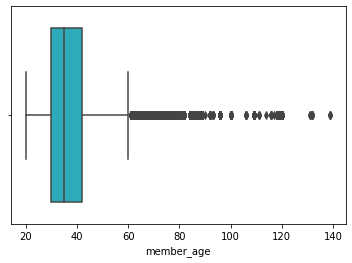

In [42]:
base_color = sb.color_palette()[9]
sb.boxplot(data = fordgobike_clean, x = 'member_age', orient="h", color=base_color)

Looks like ages range from 20 to around 60 and the mean is 36, with outliers untill 140, which I don't believe make sense, so let's drop these outliers

In [43]:
#get rid of outliers
fordgobike_clean = fordgobike_clean[fordgobike_clean['member_age'] <= 65]

In [44]:
#check for unique values in age one last time
fordgobike_clean['member_age'].unique()

array([34, 24, 29, 32, 40, 33, 26, 27, 63, 44, 56, 25, 23, 37, 49, 45, 42,
       39, 30, 50, 28, 31, 38, 35, 54, 22, 47, 41, 64, 36, 55, 57, 48, 51,
       52, 43, 61, 60, 62, 46, 21, 53, 65, 58, 59, 20])

<hr>

#### `1` Define
Create a new columns for `start_time_month`, `start_time_dayofweek` and `start_time_hour` using the `start_time` column

#### `2` Code

In [45]:
#extract start time month name
fordgobike_clean['start_time_month'] = fordgobike_clean['start_time'].dt.strftime('%B')
#extract start time weekdays
fordgobike_clean['start_time_dayofweek'] = fordgobike_clean['start_time'].dt.strftime('%a')
#extract start time hour
fordgobike_clean['start_time_hour'] = fordgobike_clean['start_time'].dt.hour

In [46]:
#Order start_time_dayofweek
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
fordgobike_clean['start_time_dayofweek'] = fordgobike_clean['start_time_dayofweek'].astype(ordered_weekdays)

#### `2` Test

In [47]:
fordgobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_dayofweek,start_time_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,34,January,Wed,22
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,24,January,Wed,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No,29,January,Wed,19
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,32,January,Wed,23
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,40,January,Wed,23


### What is the structure of your dataset?

There are 1863721 entries in Gobike data from January 2019 to March 2020 with 16 features these include information about trip duration including:(`Trip Duration`, `StartDate` and `EndDate`) and station information including : (`Start Station ID`,`Name`, `Latitude` and `Longitude`, `End Station ID`, `Name`, `Latitude` and `Longitude`), along with information about the member these includes `member_birth_year`, `member_gender` and `bike_id`, `user_type` and finally the `rental_access_method`.
### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the biking duration for this dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip duration will have the strong effect with start_time and age and gender but further investegating may show some interesting finding of relation between gender or age and the duration of biking trip.


<a id='Visual'></a>
<hr>

## Analyzing and Visualizng Data

<a id='uni'></a>

## Univariate Exploration

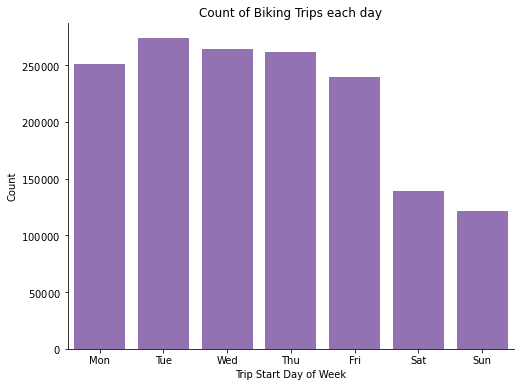

In [48]:
plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette()[4]
sb.countplot(data=fordgobike_clean, x='start_time_dayofweek', color=base_color)
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.title('Count of Biking Trips each day')
sb.despine()

The trip distribution over days of the week, it is clear that the majority of rides are on working days (Monday to Friday) and much less during weekends( Saturday and Sunday)

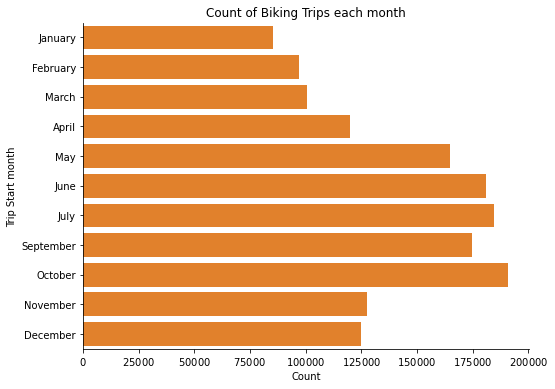

In [49]:
base_color = sb.color_palette()[1]
sb.countplot(data=fordgobike_clean, y='start_time_month', color=base_color)
plt.xlabel('Count')
plt.ylabel('Trip Start month')
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.title('Count of Biking Trips each month')
sb.despine()

The trip distribution over months of the year shows that October has the most ride trips but generally speaking more biking trips are during summer time (May to September).

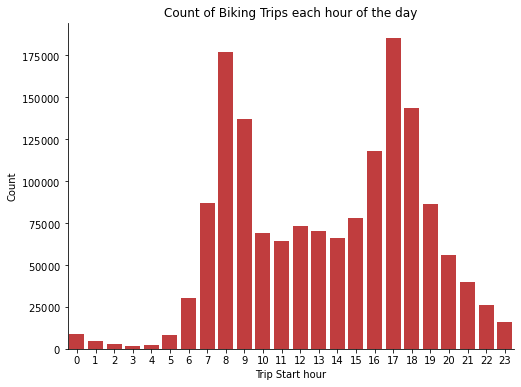

In [50]:
base_color = sb.color_palette()[3]
sb.countplot(data=fordgobike_clean, x='start_time_hour', color=base_color)
plt.xlabel('Trip Start hour')
plt.ylabel('Count')
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.title('Count of Biking Trips each hour of the day')
sb.despine()

The trip distribution over hours of the day hours have two peak values at around 8-9am and 17-18pm. Not surprising at all we know people come and leave work by those times.

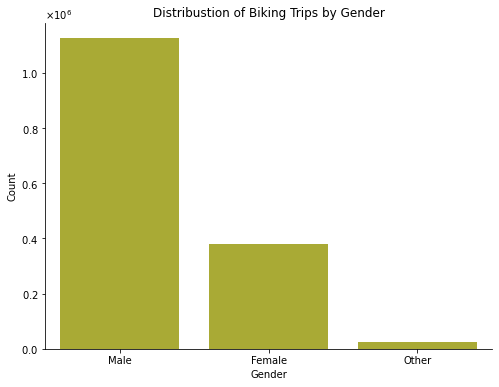

In [80]:
base_color = sb.color_palette()[8]
sb.countplot(data=fordgobike_clean, x='member_gender', color=base_color)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.title('Distribustion of Biking Trips by Gender')
sb.despine()

Most riders were males (they're about 3 times more than female riders). 

In [52]:
subscribers = fordgobike_clean.query('user_type == "Subscriber"').bike_id.count() / fordgobike_clean.bike_id.count()
customers = fordgobike_clean.query('user_type == "Customer"').bike_id.count() / fordgobike_clean.bike_id.count()

Text(0.5, 1.0, 'Distribustion of Biking Trips by User Type')

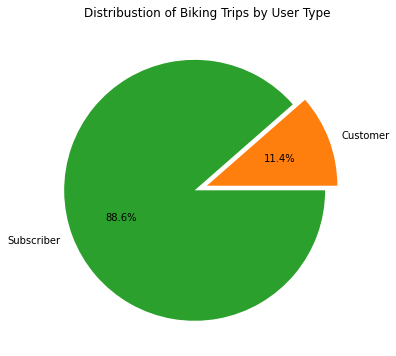

In [53]:
labels = ['Customer', 'Subscriber']
sizes = [customers, subscribers]
colors = [sb.color_palette()[1], sb.color_palette()[2]]
explode = (0, 0.1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Distribustion of Biking Trips by User Type')

Most riders are Subscribers, They're 9 times more than normal customers

In [54]:
bike_share = fordgobike_clean.query('bike_share_for_all_trip == "Yes"').bike_id.count() / fordgobike_clean.bike_id.count()
bike_no_share = fordgobike_clean.query('bike_share_for_all_trip == "No"').bike_id.count() / fordgobike_clean.bike_id.count()

Text(0.5, 1.0, 'Distribustion of Biking Trips by bike_share_for_all_trip')

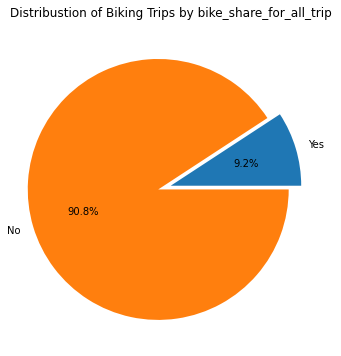

In [55]:
labels = ['Yes', 'No']
sizes = [bike_share, bike_no_share]
explode = (0, 0.1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Distribustion of Biking Trips by bike_share_for_all_trip')

Most riders didn't share their bike for all trips as seen in the previous pie chart.

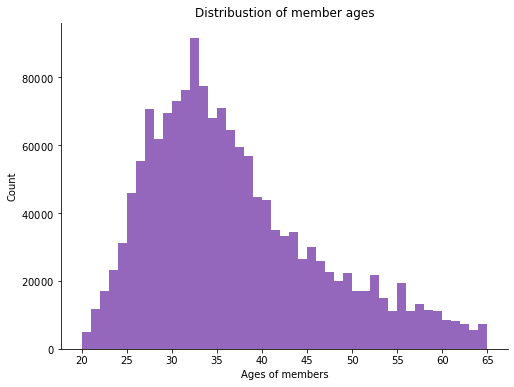

In [56]:
base_color = sb.color_palette()[4]
bins = np.arange(20, fordgobike_clean['member_age'].max() + 1, 1)
ticks = np.arange(20, fordgobike_clean['member_age'].max() + 5, 5)
plt.hist(data=fordgobike_clean, x='member_age', color=base_color, bins=bins)
plt.xlabel('Ages of members')
plt.ylabel('Count')
plt.xticks(ticks, ticks)
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.title('Distribustion of member ages')
sb.despine()

In [57]:
print(f'mean of ages is: {int(fordgobike_clean.member_age.mean())}')
print(f'median of ages is: {int(fordgobike_clean.member_age.median())}')

mean of ages is: 36
median of ages is: 34


Most members ages are between 25 to 45 years old, with mean avarage of 36 and emedian of 34 years old

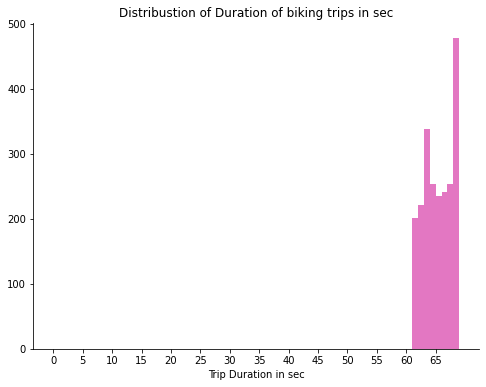

In [58]:
base_color = sb.color_palette()[6]
bins = np.arange(0, 70, 1)
ticks = np.arange(0, 70, 5)
plt.hist(data=fordgobike_clean, x='duration_sec', bins=bins, color=base_color)
plt.xticks(ticks, ticks)
plt.xlabel('Trip Duration in sec')
plt.title('Distribustion of Duration of biking trips in sec')
sb.despine()

It looks like most trips are more than a minute long, which makes total sense, so let's take a look at trip duration in minutes instead

In [59]:
fordgobike_clean['duration_min']= fordgobike_clean['duration_sec'] / 60

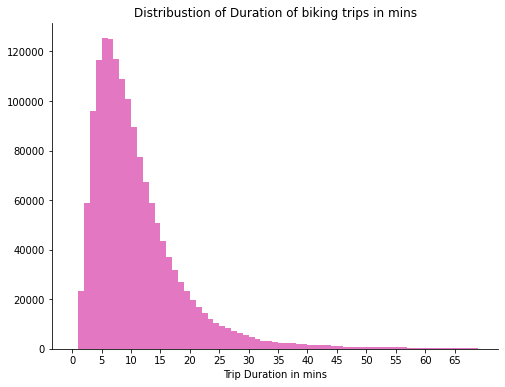

In [60]:
bins = np.arange(0, 70, 1)
ticks = np.arange(0, 70, 5)
plt.hist(data=fordgobike_clean, x='duration_min', bins =bins, color=base_color)
plt.xticks(ticks, ticks)
plt.xlabel('Trip Duration in mins')
plt.title('Distribustion of Duration of biking trips in mins')
sb.despine()

Text(0.5, 1.0, 'Distribustion of Duration of biking trips in mins')

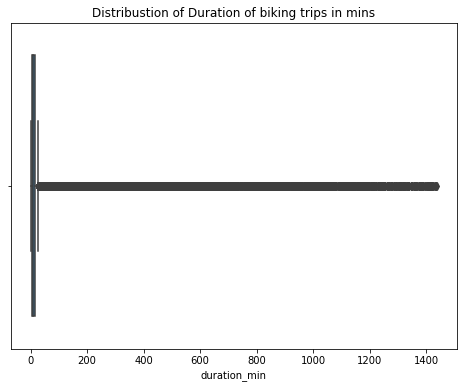

In [61]:
sb.boxplot(data = fordgobike_clean, x = 'duration_min', orient="h")
plt.title('Distribustion of Duration of biking trips in mins')

## holy moly!
We need to drop out some off these extreme outliers by calculating th equartile and median, we can figure out which values we can drop

In [62]:
fordgobike_clean.duration_min.quantile([0.25,0.5,0.75])

0.25     5.733333
0.50     9.033333
0.75    13.966667
Name: duration_min, dtype: float64

In [63]:
fordgobike_clean = fordgobike_clean[fordgobike_clean['duration_min'] <= 50]

In [64]:
fordgobike_clean.duration_min.quantile([0.25,0.5,0.75])

0.25     5.700000
0.50     8.933333
0.75    13.666667
Name: duration_min, dtype: float64

Text(0.5, 1.0, 'Distribustion of Duration of biking trips in mins')

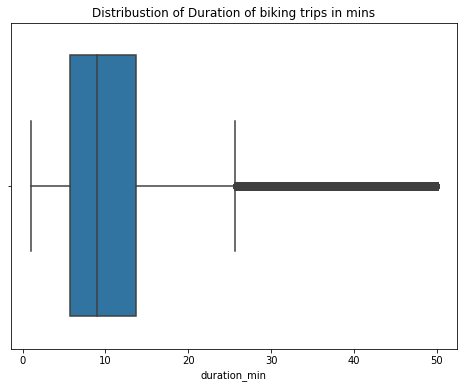

In [65]:
sb.boxplot(data = fordgobike_clean, x = 'duration_min', orient="h")
plt.title('Distribustion of Duration of biking trips in mins')


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**Hours-wise**: Biking trips count have a peak values at around 8-9am and 17-18pm during each day of the week.<br>
**Day-of-week-wise**: Biking trips count are much more on working than in to weekends.<br>
**Month-of-year-wise**: Biking trips count have a peak value in May to October.<br>
**Gender-wise**: Members are more males than female.<br>
**User-type-wise**: Members are more subscribers than to casual riders.<br>
**Share-alltrips-wise-wise**: Members who don't share their all trips are more than who do. <br>
**Age-wise**: Members ages are between 25 to 45 years old.<br>
**Trip-duration-wise**: Most rides were between 5 to 10 minutes long, with large outliers up to 1400 mins (23 hours long).<br>

No need to transforamtion in the dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When I calculated the memeber ages, most of them were under 60 year old, with outliers upto 140 years. which didn't make sense so I get rid of those large ones.

Duration in sec was not that meaningfull so I had to plot the duration of trips by minutes instead, which indeed made more usefull insights.

<a id='store'></a>
<hr>

## Storing Data
Storing clean data into csv file called: `2018-fordgobike-tripdata_clean.csv`

In [66]:
#store dataframe into twitter_archive_master.csv
fordgobike_clean.to_csv('2018-fordgobike-tripdata_clean.csv', encoding='utf-8', index=False)

<a id='bi'></a>
<hr>


## Bivariate Exploration

#### Q1:  What is the difference in the trip duration distribution between differnet ages?

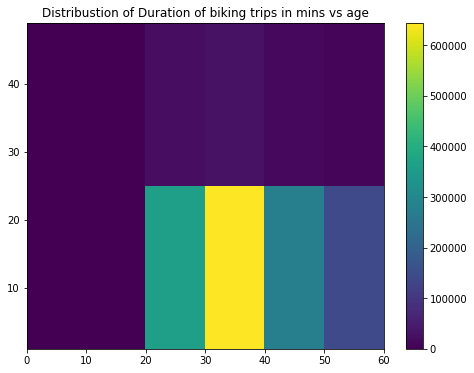

In [67]:
binsx = np.arange(0, fordgobike_clean['member_age'].max()+5, 10)
binsy = np.arange(1, fordgobike_clean['duration_min'].max() +1, 24)
plt.hist2d(fordgobike_clean['member_age'], fordgobike_clean['duration_min'], bins = [binsx, binsy])
plt.title('Distribustion of Duration of biking trips in mins vs age')
plt.colorbar()

#### Q2: What is the difference in the trip duration distribution between differnet genders?

Text(0.5, 1.0, 'Trip duration vs Gender')

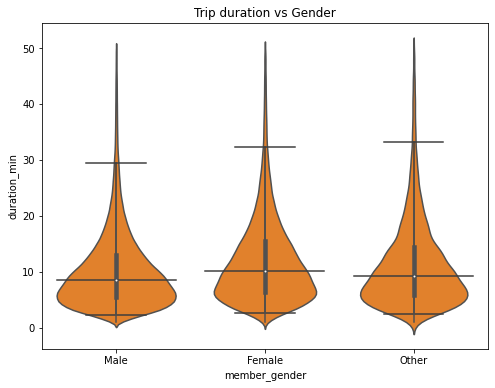

In [68]:
base_color = sb.color_palette()[1]
sb.boxplot(data=fordgobike_clean, x='member_gender', y='duration_min', showfliers=False, showbox=False, whis=[2.5,97.5])
sb.violinplot(data=fordgobike_clean, x='member_gender', y='duration_min', color=base_color)
plt.title('Trip duration vs Gender')

The trip duration distribution is pretty much close for all gender types, with differences in median that is larger in females than in males and others.

#### Q3:  What is the difference in the trip duration distribution between differnet user_types?

Text(0.5, 1.0, 'Trip duration vs user_type')

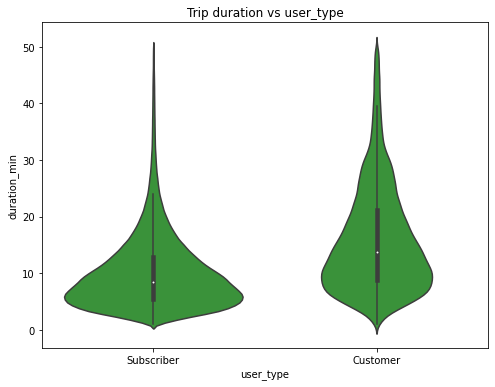

In [69]:
base_color = sb.color_palette()[2]
sb.violinplot(data=fordgobike_clean, x='user_type', y='duration_min', showfliers=False, whis=[2.5,97.5], color=base_color)
plt.title('Trip duration vs user_type')

It looks like Subscribers trips are usually shorter than customers trips.

#### Q4: What is the difference in the trip duration distribution in different months of the year?

Text(0.5, 1.0, 'Trip duration vs Month of the year')

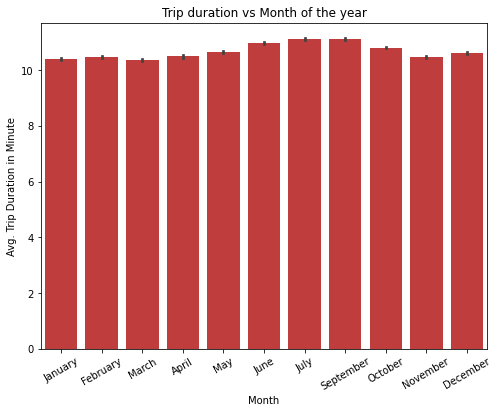

In [70]:
base_color = sb.color_palette()[3]
sb.barplot(data=fordgobike_clean, x='start_time_month', y='duration_min', color=base_color)
plt.xticks(rotation=30)
plt.xlabel('Month')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Trip duration vs Month of the year')

Distribution of duration against months of the year looks pretty close, duartions don't vary much in each month.

#### Q5: What is the difference in the trip duration distribution in different day of the week?

Text(0.5, 1.0, 'Trip duration vs day of the week')

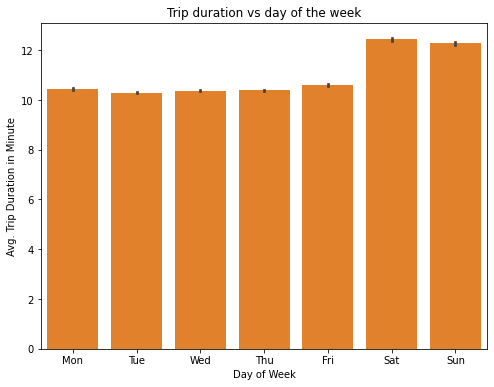

In [71]:
base_color = sb.color_palette()[1]
sb.barplot(data=fordgobike_clean, x='start_time_dayofweek', y='duration_min', color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Trip duration vs day of the week')

Duration of the trips are usually longer in weekends than in weekdays.

#### Q6: What is the difference in the trip duration distribution in different hours of the day?

Text(0.5, 1.0, 'Trip duration vs hour of the day')

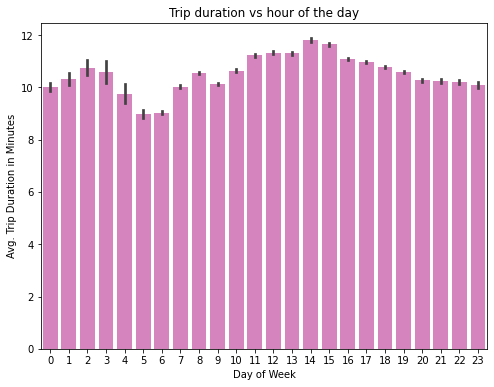

In [72]:
base_color = sb.color_palette()[6]
sb.barplot(data=fordgobike_clean, x='start_time_hour', y='duration_min', color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minutes')
plt.title('Trip duration vs hour of the day')

Longest avarage duation of trips are at 14pm each day

#### Q7: What is the distribution of the member ages vs tuser_types?

Text(0.5, 1.0, 'User type vs member_age')

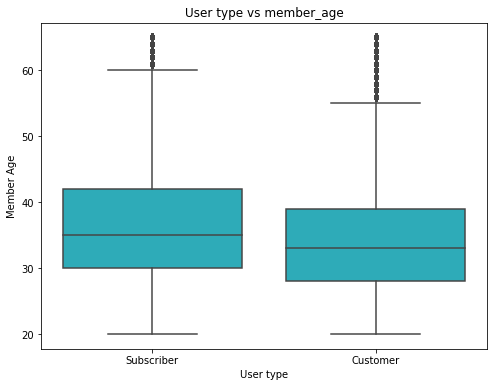

In [73]:
base_color = sb.color_palette()[9]
sb.boxplot(data=fordgobike_clean, x='user_type', y='member_age', color=base_color)
plt.xlabel('User type')
plt.ylabel('Member Age')
plt.title('User type vs member_age')

Avarage member ages for subscribes is more than customers our bikes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Duration-time vs:
Age: Trip duation is longer between ages 20-50
gender: Females trip durations are usually bit longer than male bikers.
user-type: Subscribers trips are usaully shorter than customers.
day-ofweek: Trips are longer on weekends than weekdays.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Subscribers are usally older than customers.

<a id='mul'></a>
<hr>

## Multivariate Exploration

#### Q1: What are the average trip duration in differnt months of the year for different types of users?

Text(0.5, 1.0, 'Months vs duration of trips for different user_types')

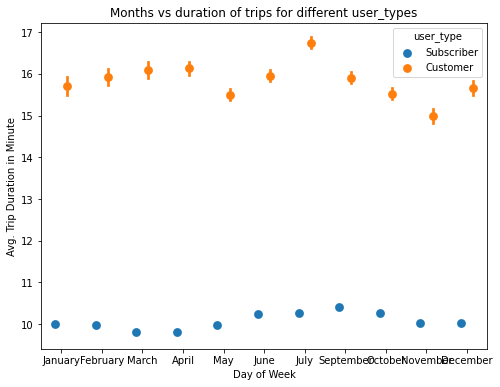

In [74]:
sb.pointplot(data=fordgobike_clean, x='start_time_month', y='duration_min', hue='user_type', dodge=0.3, linestyles="")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Months vs duration of trips for different user_types')

#### Q2: What are the average trip duration in differnt days of the week for different user_types?

Text(0.5, 1.0, 'day of the week vs duration of trips for different user_types')

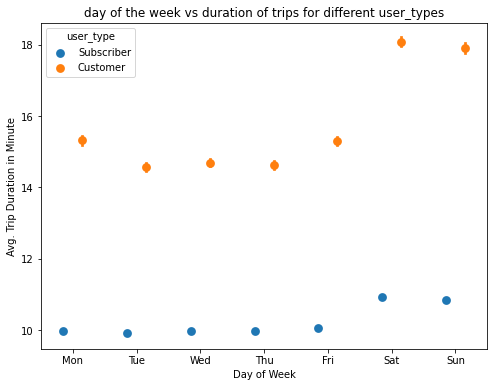

In [75]:
sb.pointplot(data=fordgobike_clean, x='start_time_dayofweek', y='duration_min', hue='user_type', dodge=0.3, linestyles="")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('day of the week vs duration of trips for different user_types')

Members have longer biking trips in weekdays than other days.

#### Q3: What are the average trip duration in differnt hours of the day for different user_types?

Text(0.5, 1.0, 'hour of the day vs duration of trips for different user_types')

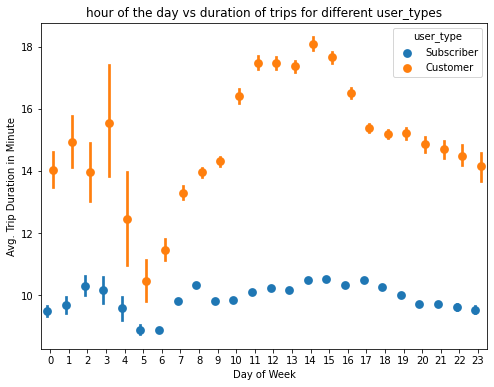

In [76]:
sb.pointplot(data=fordgobike_clean, x='start_time_hour', y='duration_min', hue='user_type', dodge=0.3, linestyles="")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('hour of the day vs duration of trips for different user_types')

Subscribers bike longer in in avarage, with peak at 14pm

#### Q4: What are the average trip duration in differnt months of the year for different genders?

Text(0.5, 1.0, 'Months vs duration of trips for different genders')

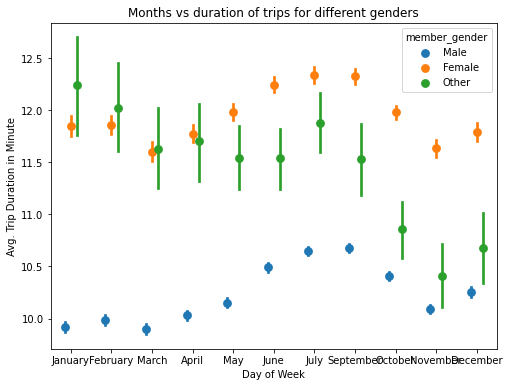

In [77]:
sb.pointplot(data=fordgobike_clean, x='start_time_month', y='duration_min', hue='member_gender', dodge=0.3, linestyles="")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Months vs duration of trips for different genders')

Members bike longer in summer and female bikers usually bike longer than others in differnt months.

#### Q5: What are the average trip duration in differnt day of the week for different genders?

Text(0.5, 1.0, 'day of the week vs duration of trips for different genders')

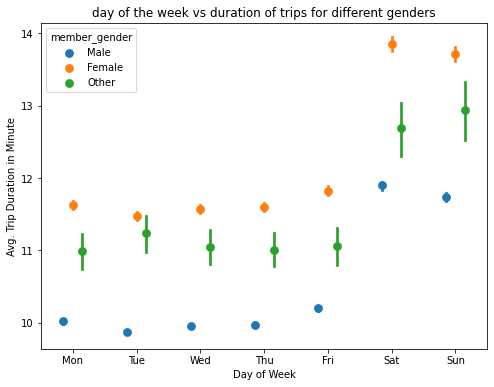

In [78]:
sb.pointplot(data=fordgobike_clean, x='start_time_dayofweek', y='duration_min', hue='member_gender', dodge=0.3, linestyles="")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('day of the week vs duration of trips for different genders')

#### Q6: What are the average trip duration in differnt hours of the day for different genders?

Text(0.5, 1.0, 'hour of the day vs duration of trips for different genders')

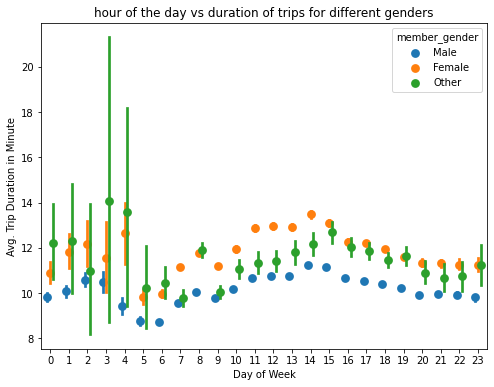

In [79]:
sb.pointplot(data=fordgobike_clean, x='start_time_hour', y='duration_min', hue='member_gender', dodge=0.3, linestyles="")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('hour of the day vs duration of trips for different genders')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened the feature of interest looked at previoslt in bivariate graphs.<br>
Although the count male users is higher but percentage is higher for women and other in trip duration.

### Were there any interesting or surprising interactions between features?

Trips on weekends are longer than weekdays.<br>
Female bikers bike longer than male bikers.<br>
Customers bike longer than Subscribers.